# Modeling.ipynb

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, auc
from prophet_rmse import stock_rmse
import seaborn as sns
import datetime
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

Importing plotly failed. Interactive plots will not work.


Loading Data from YahooFinance API (through yfinance package

In [2]:
# Load stock data for a particular ticker
ticker = "PNM"

# Get today's date
today = datetime.datetime.now()

# Subtract one day to get yesterday's date
yesterday = today - datetime.timedelta(days=1)

# Format yesterday's date as a string in yyyy-mm-dd format
yesterday_str = yesterday.strftime("%Y-%m-%d")

raw_data = yf.download(ticker, start="2010-01-01", end=yesterday_str, interval='1d')

[*********************100%***********************]  1 of 1 completed


Formatting data to input to model (predicting adjusted closing prices)

In [3]:
# Prepare data for Prophet model
df = pd.DataFrame({'ds': raw_data.index, 'y': raw_data['Adj Close']})
df.reset_index(inplace=True, drop=True)
print('done')

done


Create, fit, and generate predictions with model

In [4]:
# Create and fit the Prophet model
m = Prophet(daily_seasonality=True)

m.fit(df)

# Generate predictions for the next 30 days
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
print('done')

17:47:18 - cmdstanpy - INFO - Chain [1] start processing
17:47:23 - cmdstanpy - INFO - Chain [1] done processing


done


Create plot of model predictions vs. actual over time

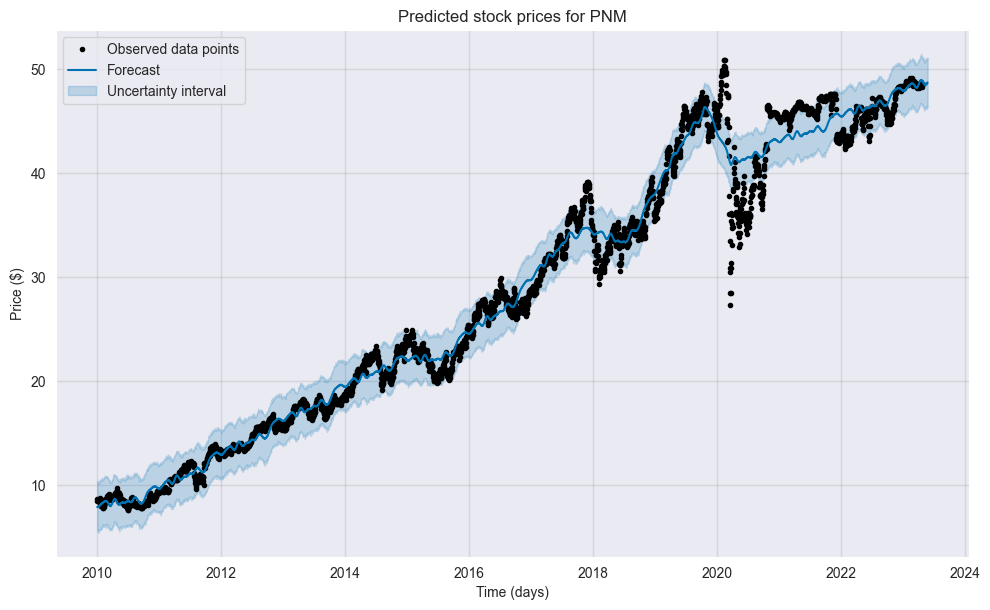

In [5]:
# Plot the predicted prices
fig = m.plot(forecast)
plt.title(f'Predicted stock prices for {ticker}')
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

Get plot of model performance over last 3 months with next month of adjusted closing predictions

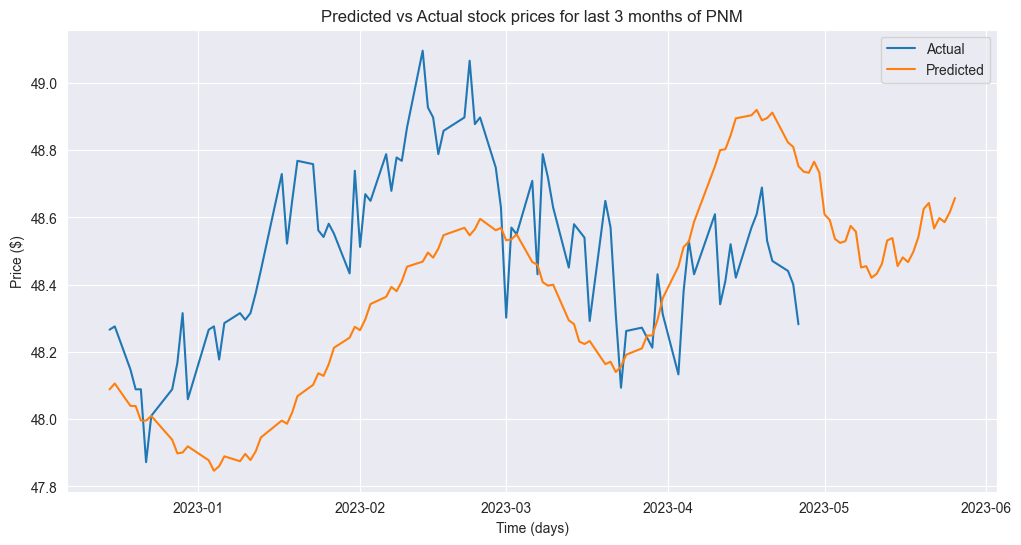

In [6]:
# Plot the predicted vs actual prices for range
last_month = forecast.iloc[-120:]
last_month_actual = raw_data.iloc[-90:]
fig2 = plt.figure(figsize=(12,6))
plt.plot(last_month_actual.index, last_month_actual['Adj Close'], label='Actual')
plt.plot(last_month.ds, last_month.yhat, label='Predicted')
plt.title(f'Predicted vs Actual stock prices for last 3 months of {ticker}')
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.autoscale()
plt.legend()
plt.show()

Evaluate model performance using prophet.diagnostics cross_validation

In [7]:
# Perform cross validation with horizon of 30 days and a sliding window of 1 day
df_cv = cross_validation(m, horizon='90 days', period='45 days', initial='730 days', parallel="processes")

# Compute performance metrics
df_metrics = performance_metrics(df_cv)

# Print performance metrics
print(df_metrics)

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
17:47:30 - cmdstanpy - INFO - Chain [1] start processing
17:47:30 - cmdstanpy - INFO - Chain [1] start processing
17:47:30 - cmdstanpy - INFO - Chain [1] start processing
17:47:30 - cmdstanpy - INFO - Chain [1] start processing
17:47:30 - cmdstanpy - INFO - Chain [1] done processing
17:47:31 - cmdstanpy - INFO - Chain [1] done processing
17:47:31 - cmdstanpy - INFO - Chain [1] done processing
17:47:31 - cmdstanpy - INFO - Chain [1] start processing
17:47:31 - cmdstanpy - INFO - Chain [1] done processing
17:47:31 - cmdstanpy - INFO - Chain [1] start processing
17:47:31 - cmdstanpy - INFO - Chain [1] start processing
17:47:31 - cmdstanpy - INFO - Chain [1] start processing
17:47:32 - cmdstanpy - INFO - Chain [1] done processing
17:47:32 - cmdstanpy - INFO - Ch

   horizon        mse      rmse       mae      mape     mdape     smape   
0   9 days   8.235386  2.869736  1.820288  0.056053  0.037736  0.054324  \
1  10 days   8.217980  2.866702  1.839237  0.056821  0.037867  0.055080   
2  11 days   8.531908  2.920943  1.902063  0.058838  0.038487  0.057077   
3  12 days   8.399696  2.898223  1.922047  0.059457  0.039827  0.057781   
4  13 days   7.816220  2.795750  1.883875  0.058222  0.039081  0.056766   
..     ...        ...       ...       ...       ...       ...       ...   
77 86 days  17.394732  4.170699  2.745940  0.088004  0.063726  0.084976   
78 87 days  18.433036  4.293371  2.820192  0.090505  0.065336  0.087287   
79 88 days  18.574829  4.309853  2.831311  0.091151  0.065947  0.087804   
80 89 days  18.067870  4.250632  2.798268  0.090180  0.065565  0.086865   
81 90 days  18.092277  4.253502  2.805133  0.090253  0.066554  0.087095   

    coverage  
0   0.482944  
1   0.473070  
2   0.447935  
3   0.440975  
4   0.444387  
..       

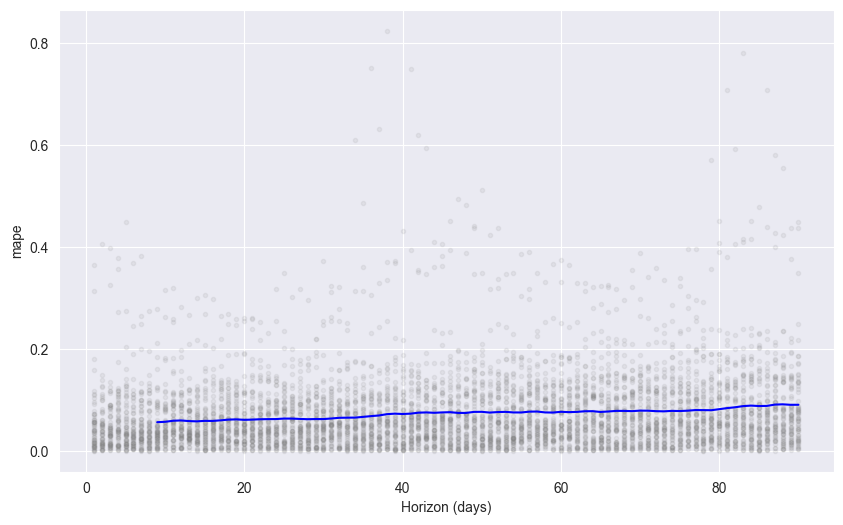

In [8]:
fig = plot_cross_validation_metric(df_cv, metric='mape')